<a href="https://colab.research.google.com/github/Vasiliki655/DSC511-Introduction/blob/main/Lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Apache Spark II
Last time we familiarized with RDDs, today we will move on to DataFrames!

In [ ]:
! pip install pyspark

## Defining master within pyspark
This time, due to the fact that we are going to use DataFrames, which are defined under Spark SQL, it is essential that we import SparkSession and not SparkContext & SparkConf.

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import *

spark = SparkSession.builder.appName("App").master("local").getOrCreate()

## DataFrame Example 1: Create a DataFrame from External Data Sources

You can download the csv from [here](https://github.com/JuliaData/CSV.jl/blob/main/test/testfiles/SalesJan2009.csv), and upload it like he have the previous times.<br><br>

First of all, let's study the options that we can put when reading a csv file as a pyspark dataframe:
```python
spark.read.options(header='True', inferSchema='True', delimiter=',').csv("file.csv")
```
- The first option, <strong>header</strong>, by setting it as true, it lets spark know that our csv has indeed a header, meaning the first line determines the columns/fields.
- By enabling <strong>inferSchema</strong> Spark will automatically go through the csv file and infer the schema of each column. Although this option will make the reading slower, it will have as a result a dataframe that will most likely have a correct schema given its input (dataset).
- Lastly, we can specify the <strong>delimiter</strong>, which in most cases it's "," (comma), as to specify how the fields are divided into the dataset.

In [ ]:
df = spark.read.options(header='True', inferSchema='True', delimiter=',').csv("SalesJan2009.csv")
print("---------Type---------")   # inferSchema='True': if .... is integer if not
print(type(df))
print("--------Schema--------")
# with .printSchema() we can get our dataset's schema
df.printSchema()
print("-----First 5 Rows-----")
# and with .head(), we can get the first x rows, depending on the input we give in the method
df.head(5)

---------Type---------
<class 'pyspark.sql.dataframe.DataFrame'>
--------Schema--------
root
 |-- 1/2/09 6:17: string (nullable = true)
 |-- Product1: string (nullable = true)
 |-- 1200: integer (nullable = true)
 |-- Mastercard: string (nullable = true)
 |-- carolina: string (nullable = true)
 |-- Basildon: string (nullable = true)
 |-- England: string (nullable = true)
 |-- United Kingdom: string (nullable = true)
 |-- 1/2/09 6:00: string (nullable = true)
 |-- 1/2/09 6:08: string (nullable = true)
 |-- 51.5: double (nullable = true)
 |-- -1.1166667: double (nullable = true)

-----First 5 Rows-----


[Row(1/2/09 6:17='1/2/09 4:53', Product1='Product1', 1200=1200, Mastercard='Visa', carolina='Betina', Basildon='Parkville', England='MO', United Kingdom='United States', 1/2/09 6:00='1/2/09 4:42', 1/2/09 6:08='1/2/09 7:49', 51.5=39.195, -1.1166667=-94.68194),
 Row(1/2/09 6:17='1/2/09 13:08', Product1='Product1', 1200=1200, Mastercard='Mastercard', carolina='Federica e Andrea', Basildon='Astoria', England='OR', United Kingdom='United States', 1/2/09 6:00='1/1/09 16:21', 1/2/09 6:08='1/3/09 12:32', 51.5=46.18806, -1.1166667=-123.83),
 Row(1/2/09 6:17='1/3/09 14:44', Product1='Product1', 1200=1200, Mastercard='Visa', carolina='Gouya', Basildon='Echuca', England='Victoria', United Kingdom='Australia', 1/2/09 6:00='9/25/05 21:13', 1/2/09 6:08='1/3/09 14:22', 51.5=-36.1333333, -1.1166667=144.75),
 Row(1/2/09 6:17='1/4/09 12:56', Product1='Product2', 1200=3600, Mastercard='Visa', carolina='Gerd W', Basildon='Cahaba Heights', England='AL', United Kingdom='United States', 1/2/09 6:00='11/15/08 

In [ ]:
print("--Interactive 5 Rows--")
# Nevertheless, as we could see above, head does not return the rows in a pretty way, so we can use .show() for that
df.show(5)

--Interactive 5 Rows--
+------------+--------+----+----------+-----------------+--------------+--------+--------------+--------------+------------+-----------+----------+
| 1/2/09 6:17|Product1|1200|Mastercard|         carolina|      Basildon| England|United Kingdom|   1/2/09 6:00| 1/2/09 6:08|       51.5|-1.1166667|
+------------+--------+----+----------+-----------------+--------------+--------+--------------+--------------+------------+-----------+----------+
| 1/2/09 4:53|Product1|1200|      Visa|           Betina|     Parkville|      MO| United States|   1/2/09 4:42| 1/2/09 7:49|     39.195| -94.68194|
|1/2/09 13:08|Product1|1200|Mastercard|Federica e Andrea|       Astoria|      OR| United States|  1/1/09 16:21|1/3/09 12:32|   46.18806|   -123.83|
|1/3/09 14:44|Product1|1200|      Visa|            Gouya|        Echuca|Victoria|     Australia| 9/25/05 21:13|1/3/09 14:22|-36.1333333|    144.75|
|1/4/09 12:56|Product2|3600|      Visa|           Gerd W|Cahaba Heights|      AL| United 

## DataFrame Example 2: Create a DataFrame from a Python List

In [ ]:
data = [('James','','Smith','1991-04-01','M',3000),
  ('Michael','Rose','','2000-05-19','M',4000),
  ('Robert','','Williams','1978-09-05','M',4000),
  ('Maria','Anne','Jones','1967-12-01','F',4000),
  ('Jen','Mary','Brown','1980-02-17','F',-1)
]

columns = ["firstname","middlename","lastname","dob","gender","salary"]
df = spark.createDataFrame(data=data, schema=columns)
df.show()

+---------+----------+--------+----------+------+------+
|firstname|middlename|lastname|       dob|gender|salary|
+---------+----------+--------+----------+------+------+
|    James|          |   Smith|1991-04-01|     M|  3000|
|  Michael|      Rose|        |2000-05-19|     M|  4000|
|   Robert|          |Williams|1978-09-05|     M|  4000|
|    Maria|      Anne|   Jones|1967-12-01|     F|  4000|
|      Jen|      Mary|   Brown|1980-02-17|     F|    -1|
+---------+----------+--------+----------+------+------+



We can see that we cannot really see the data in a manner that we can comprehend them.
In order to see them in a more 'interactive' way we can do the following:

## Hands-On! :)
You can always visit [this site](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.DataFrame.html) to find pyspark RDD methods.
### Part 1
1. Create a DataFrame based on the "data" and "columns" list that is provided below.
2. Count how many elements are in your DataFrame using the method .count()
3. Print the elements that the dataframe holds using the method .show()
4. Print the elements that the dataframe columns holds using .columns
5. Print only the elements of the columns' "id" and "Title" using the method .select()
6. Use the methods describe() and show() to see a summary of statistics of the dataframe

In [ ]:
data = [('0','Tangled','2010','Animation|Children|Comedy|Fantasy|Musical|Romance|IMAX'),
  ('1','Avengers: Infinity War - Part I','2018','Action|Adventure|Sci-Fi'),
  ('2','Deadpool','2016','Action|Adventure|Comedy|Sci-Fi'),
  ('3','Ant-Man and the Wasp','2018','Action|Adventure|Comedy|Fantasy|Sci-Fi'),
  ('4','Logan','2017','Action|Sci-Fi'),
  ('5','Pocahontas','1995','Animation|Children|Drama|Musical|Romance'),
  ('6','Devil Wears Prada','2006','Comedy|Drama'),
  ('7','Howl\'s Moving Castle ','2004','Adventure|Animation|Fantasy|Romance'),
  ('8','Spirited Away','2001','Adventure|Animation|Fantasy'),
  ('9','Avatar','2009','Action|Adventure|Sci-Fi|IMAX')
]

columns = ["id","Title","Year","Genre"]

In [ ]:
# TODO 1: Create a DataFrame based on the "data" and "columns" list that is provided above.
dataframe =spark.createDataFrame(data=data,schema=columns)

In [ ]:
# TODO 2: Count how many elements are in your DataFrame using the method .count()
dataframe.count()

10

In [ ]:
# TODO 3: Print the elements that the dataframe holds using the method .show()
dataframe.show()

+---+--------------------+----+--------------------+
| id|               Title|Year|               Genre|
+---+--------------------+----+--------------------+
|  0|             Tangled|2010|Animation|Childre...|
|  1|Avengers: Infinit...|2018|Action|Adventure|...|
|  2|            Deadpool|2016|Action|Adventure|...|
|  3|Ant-Man and the Wasp|2018|Action|Adventure|...|
|  4|               Logan|2017|       Action|Sci-Fi|
|  5|          Pocahontas|1995|Animation|Childre...|
|  6|   Devil Wears Prada|2006|        Comedy|Drama|
|  7|Howl's Moving Cas...|2004|Adventure|Animati...|
|  8|       Spirited Away|2001|Adventure|Animati...|
|  9|              Avatar|2009|Action|Adventure|...|
+---+--------------------+----+--------------------+



In [ ]:
# TODO 4: Print the elements that the dataframe columns holds using .columns
dataframe.columns

['id', 'Title', 'Year', 'Genre']

In [ ]:
# TODO 5: Print only the elements of the columns' "id" and "Title" using the method .select()
dataframe.select("id","Title").show()

+---+--------------------+
| id|               Title|
+---+--------------------+
|  0|             Tangled|
|  1|Avengers: Infinit...|
|  2|            Deadpool|
|  3|Ant-Man and the Wasp|
|  4|               Logan|
|  5|          Pocahontas|
|  6|   Devil Wears Prada|
|  7|Howl's Moving Cas...|
|  8|       Spirited Away|
|  9|              Avatar|
+---+--------------------+



In [ ]:
# TODO 6: Use the methods .describe() and .show() to see a summary of statistics of the dataframe
dataframe.describe().show()

+-------+------------------+--------------------+-----------------+--------------------+
|summary|                id|               Title|             Year|               Genre|
+-------+------------------+--------------------+-----------------+--------------------+
|  count|                10|                  10|               10|                  10|
|   mean|               4.5|                NULL|           2009.4|                NULL|
| stddev|3.0276503540974917|                NULL|7.947046970765625|                NULL|
|    min|                 0|Ant-Man and the Wasp|             1995|Action|Adventure|...|
|    max|                 9|             Tangled|             2018|        Comedy|Drama|
+-------+------------------+--------------------+-----------------+--------------------+



## Part 2: Load the csv into a PySpark DataFrame and perform the following basic operations:
1. Read the contents of the "SalesJan2009.csv" file into a dataframe. (The same dataset as we used in our example)
2. Filter out all products that have a price under 100 and print the result
3. Group your dataframe by the column Country. Then use aggregation to get the average of the column Price, and the its sum, and print the result.

<strong>** Tip, you can use the method .alias() to change the name of the produced column, e.g. sum("Price").alias("total_sales")</strong>

In [ ]:
# TODO 1: Read the contents of the "SalesJan2009.csv" file into a dataframe
df = spark.read.options(header='True',cinferSchema='True', delimiter=',').csv("SalesJan2009.csv")

In [ ]:
df.columns

['Transaction_date',
 'Product',
 'Price',
 'Payment_Type',
 'Name',
 'City',
 'State',
 'Country',
 'Account_Created',
 'Last_Login',
 'Latitude',
 'Longitude']

In [ ]:
# TODO 2: Filter out all products that have a price under 100 and print the result
filtered_df = df.filter(df.Price>=100) # col("Price")
filtered_df.show()

+----------------+--------+-----+------------+-----------------+--------------------+--------------+--------------+---------------+------------+-----------+----------+
|Transaction_date| Product|Price|Payment_Type|             Name|                City|         State|       Country|Account_Created|  Last_Login|   Latitude| Longitude|
+----------------+--------+-----+------------+-----------------+--------------------+--------------+--------------+---------------+------------+-----------+----------+
|     1/2/09 6:17|Product1| 1200|  Mastercard|         carolina|            Basildon|       England|United Kingdom|    1/2/09 6:00| 1/2/09 6:08|       51.5|-1.1166667|
|     1/2/09 4:53|Product1| 1200|        Visa|           Betina|Parkville        ...|            MO| United States|    1/2/09 4:42| 1/2/09 7:49|     39.195| -94.68194|
|    1/2/09 13:08|Product1| 1200|  Mastercard|Federica e Andrea|Astoria          ...|            OR| United States|   1/1/09 16:21|1/3/09 12:32|   46.18806|   -

In [ ]:
# TODO 3: Group your dataframe by the column 'Country'. Then use aggregation to get the average of the column 'Price',
# and the its 'sum', and print the result.
grouped_df = df.groupBy("Country").agg(avg("Price").alias("avg_price"),sum("Price").alias("total_sales"))
grouped_df.show()

+-------------+------------------+-----------+
|      Country|         avg_price|total_sales|
+-------------+------------------+-----------+
|       Russia|            3600.0|     3600.0|
|       Sweden|1753.8461538461538|    22800.0|
|       Jersey|            1200.0|     1200.0|
|  Philippines|            1200.0|     2400.0|
|     Malaysia|            1200.0|     1200.0|
|       Turkey|            1200.0|     7200.0|
|      Germany|            1680.0|    42000.0|
|       France|1966.6666666666667|    53100.0|
|       Greece|            1200.0|     1200.0|
|    Argentina|            1200.0|     1200.0|
|      Belgium|            1500.0|    12000.0|
|      Finland|            1200.0|     2400.0|
|United States|1595.2380952380952|   737000.0|
|        India|            1200.0|     2400.0|
|        China|            1200.0|     1200.0|
|       Kuwait|            1200.0|     1200.0|
|        Malta|            2400.0|     4800.0|
|        Italy|            2520.0|    37800.0|
|       Norwa

## Part 3: Join two PySpark DataFrames on a common column and perform various operations:
1. Create dataframes based on the data1, and data2 lists that are provided below.
2. Remove and duplicates from the dataframes using the method .distinct().
3. Join the two dataframes and sort the result by the column "Age" using the methods .join() and col(). Then print the result.<br>
<strong>-- For the following steps, if it's not specified which dataframe to use as an input, use the joined dataframe. --</strong><br>
4. Filter out all people that have male as gender using the .where() and col() methods.
5. Select only the Columns Name, Age and Salary and print it.
6. Based on the selection you did before, apply a group by based on the column Name, and perform aggregation on: (i) Average of Age, (ii) Sum of Salary, and print the result.
7. Perform the following aggregation on Salary: (i) Average, (ii) Min, (iii) Max, and print the result.
8. Based on the aggregated dataframe you created in the 7th step, rename all columns using the .withColumnRenamed() method to the following format: e.g. avg(Salary) -> average_salary
9. Group your dataframe by Gender, and perform a new aggregation by calculating the average of the column Salary and the max of the column Age.
10. Group by name, and rotate the column Gender from one column into multiple columns using the .pivot() method. Then, apply aggregation on the sum of Salary. Print the result.
11. Drop the column Gender using the method .drop() and print the result.
12. Add a new column in the dataframe called 'Salary Per Year', which will multiply columns 'Salary' by 13 (12 months per year, plus 13th salary) using the .withColumn() method. Print the result.
13. Convert the dataframe you created in step 12 into a Pandas Dataframe. Then, sort the values based on 'Age' and create a bar plot where the column "Name" will be in x axis, and "Salary Per Year" as a "y" axis.

In [ ]:
# The columns are: "Name", "Age", and "Gender"
data1 = [("John", 27, "M"),
         ("Jane", 30, "F"),
         ("Jim", 35, "M"),
         ("Joanna", 25, "F"),
         ("Joanna", 25, "F"),
         ("Joanna", 25, "F"),
         ("Joanna", 25, "F"),
         ("Janine", 40, "F")]

# The columns are: "Name", "Salary"
data2 = [("John", 100),
         ("Jane", 200),
         ("Jane", 200),
         ("Jim", 300),
         ("Joanna", 400),
         ("Janine", 500)]

In [ ]:
# TODO 1: Create dataframes based on the data1, and data2 lists that are provided above.
df1 =spark.createDataFrame(data1,["Name","Age","Gender"])
df2 =spark.createDataFrame(data2,["Name","Salary"])

In [ ]:
# TODO 2: Remove and duplicates from the dataframes using the method .distinct()
df1 = df1.distinct()
df2 = df2.distinct()

In [ ]:
# TODO 3: Join the two dataframes and sort the result by the column "Age" using the methods .join() and col(). Then print the result.
joined_df = df1.join(df2,"Name").sort("Age")
joined_df.show()

+------+---+------+------+
|  Name|Age|Gender|Salary|
+------+---+------+------+
|Joanna| 25|     F|   400|
|  John| 27|     M|   100|
|  Jane| 30|     F|   200|
|   Jim| 35|     M|   300|
|Janine| 40|     F|   500|
+------+---+------+------+



In [ ]:
# TODO 4: Filter out all people that have male as gender using the .where() and col() methods.
filtered_df = joined_df.where(joined_df.Gender=="F")
filtered_df.show()

+------+---+------+------+
|  Name|Age|Gender|Salary|
+------+---+------+------+
|Joanna| 25|     F|   400|
|  Jane| 30|     F|   200|
|Janine| 40|     F|   500|
+------+---+------+------+



In [ ]:
# TODO 5: Select only the Columns 'Name', 'Age' and 'Salary' and print it.
selected_df = joined_df.select("Name","Age","Salary")
selected_df.show()

+------+---+------+
|  Name|Age|Salary|
+------+---+------+
|Joanna| 25|   400|
|  John| 27|   100|
|  Jane| 30|   200|
|   Jim| 35|   300|
|Janine| 40|   500|
+------+---+------+



In [ ]:
aggregated_df = selected_df.groupBy("Name").agg({})


In [ ]:
# TODO 6: Based on the selection you did before, apply a group by based on the column 'Name', and
# perform aggregation on: (i) Average of Age, (ii) Sum of Salary, and print the result.
aggregated_df = selected_df.groupBy("Name").agg(avg("Age").alias("avg_age"),sum("Salary").alias("total_salary"))
aggregated_df.show()

+------+-------+------------+
|  Name|avg_age|total_salary|
+------+-------+------------+
|   Jim|   35.0|         300|
|Joanna|   25.0|         400|
|  John|   27.0|         100|
|Janine|   40.0|         500|
|  Jane|   30.0|         200|
+------+-------+------------+



In [ ]:
# TODO 7: Perform the following aggregation on Salary: (i) Average, (ii) Min, (iii) Max, and print the result.
df_aggregated = joined_df.agg(avg("Salary"),min("Salary"),max("Salary"))
df_aggregated.show()

+-----------+-----------+-----------+
|avg(Salary)|min(Salary)|max(Salary)|
+-----------+-----------+-----------+
|      300.0|        100|        500|
+-----------+-----------+-----------+



In [ ]:
# TODO 8: Based on the aggregated dataframe you created in the 7th step, rename all columns using
# the .withColumnRenamed() method to the following format: e.g. avg(Salary) -> average_salary
df_aggregated.withColumnRenamed("avg(Salary)","average_salary").withColumnRenamed("min(Salary)","min_salary").withColumnRenamed("max(Salary)","max_salary").show()

+--------------+----------+----------+
|average_salary|min_salary|max_salary|
+--------------+----------+----------+
|         300.0|       100|       500|
+--------------+----------+----------+



In [ ]:
# TODO 9: Group your dataframe by Gender, and perform a new aggregation by calculating the average of
# the column 'Salary' and the max of the column 'Age'.
joined_df.groupBy("Gender").agg(avg("Salary"),max("Age")).show()

+------+-----------------+--------+
|Gender|      avg(Salary)|max(Age)|
+------+-----------------+--------+
|     F|366.6666666666667|      40|
|     M|            200.0|      35|
+------+-----------------+--------+



In [ ]:
# TODO 10: Group by name, and rotate the column 'Gender' from one column into multiple columns using
# the .pivot() method. Then, apply aggregation on the sum of 'Salary'. Print the result.
joined_df.groupBy("Name").pivot("Gender").sum("Salary").show()

+------+----+----+
|  Name|   F|   M|
+------+----+----+
|   Jim|NULL| 300|
|Joanna| 400|NULL|
|  John|NULL| 100|
|Janine| 500|NULL|
|  Jane| 200|NULL|
+------+----+----+



In [ ]:
# TODO 11: Drop the column 'Gender' using the method .drop() and print the result.
joined_df.drop("Gender").show()

+------+---+------+
|  Name|Age|Salary|
+------+---+------+
|Joanna| 25|   400|
|  John| 27|   100|
|  Jane| 30|   200|
|   Jim| 35|   300|
|Janine| 40|   500|
+------+---+------+



In [ ]:
# TODO 12: Add a new column in the dataframe called 'Salary Per Year', which will multiply
# columns 'Salary' by 13 (12 months per year, plus 13th salary) using the .withColumn() method. Print the result.
total_df = joined_df.withColumn("Salary Per Year",col("Salary")*13)
total_df.show()

+------+---+------+------+---------------+
|  Name|Age|Gender|Salary|Salary Per Year|
+------+---+------+------+---------------+
|Joanna| 25|     F|   400|           5200|
|  John| 27|     M|   100|           1300|
|  Jane| 30|     F|   200|           2600|
|   Jim| 35|     M|   300|           3900|
|Janine| 40|     F|   500|           6500|
+------+---+------+------+---------------+



<Axes: xlabel='Name'>

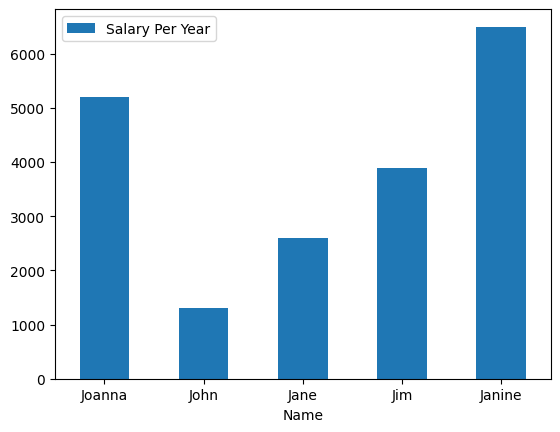

In [ ]:
# TODO 13: Convert the dataframe you created in step 12 into a Pandas Dataframe.
# Then, sort the values based on 'Age' and create a bar plot where the column "Name"
# will be in x axis, and "Salary Per Year" as a "y" axis.

# Convert the DataFrame to a Pandas DataFrame
pandas_df =topandas
# Create a bar plot
pandas_df.

## Part 4: Num of products / country
Reproduce the exercise we had for map-reduce but this time use pyspark dataframes.<br>
- Read the "SalesJan2009.csv" file as before, and find the number of products and the sum of sales per country.

There are various ways you can implement this, today we are going to implement this with two ways:<br>
### Implementation 1:
1. Read the csv file as a dataframe
2. Select from that dataframe the columns "Country" and "Price" using the .select() method (it would also be a good idea to cast the column Price into an integer)
3. Group the dataframe by the column "Country"
4. Use the .agg() method to sum() and count() all prices
5. Sort the dataframe by Country()

<strong>For all implementations add the magic command %%time to compare processing time</strong>

In [ ]:
%%time
df =


+------------------+-----+-----------+
|           Country|count|total_sales|
+------------------+-----+-----------+
|         Argentina|    1|       1200|
|         Australia|   38|      64800|
|           Austria|    7|      10800|
|           Bahrain|    1|       1200|
|           Belgium|    8|      12000|
|           Bermuda|    1|       1200|
|            Brazil|    5|      12300|
|          Bulgaria|    1|       1200|
|            Canada|   76|     124800|
|       Cayman Isls|    1|       1200|
|             China|    1|       1200|
|        Costa Rica|    1|       1200|
|    Czech Republic|    3|       6000|
|           Denmark|   15|      18000|
|Dominican Republic|    1|       1200|
|           Finland|    2|       2400|
|            France|   27|      53100|
|           Germany|   25|      42000|
|            Greece|    1|       1200|
|         Guatemala|    1|       1200|
+------------------+-----+-----------+
only showing top 20 rows

CPU times: user 14.6 ms, sys: 3.58 ms,

### Implementation 2:
1. Load the file into a pyspark dataframe (use only the header=True as an extra option)
2. Select only the columns Country and Price
3. Convert the dataframe into an RDD
4. Use the map-reduce RDD implementation that is given below, and apply it to the RDD you created.
5. Convert your RDD back to a dataframe
6. Print your result

In [ ]:
%%time
df =


+------------------+-----+-----------+
|           Country|count|total_sales|
+------------------+-----+-----------+
|         Argentina|    1|       1200|
|         Australia|   38|      64800|
|           Austria|    7|      10800|
|           Bahrain|    1|       1200|
|           Belgium|    8|      12000|
|           Bermuda|    1|       1200|
|            Brazil|    5|      12300|
|          Bulgaria|    1|       1200|
|            Canada|   76|     124800|
|       Cayman Isls|    1|       1200|
|             China|    1|       1200|
|        Costa Rica|    1|       1200|
|    Czech Republic|    3|       6000|
|           Denmark|   15|      18000|
|Dominican Republic|    1|       1200|
|           Finland|    2|       2400|
|            France|   27|      53100|
|           Germany|   25|      42000|
|            Greece|    1|       1200|
|         Guatemala|    1|       1200|
+------------------+-----+-----------+
only showing top 20 rows

CPU times: user 41 ms, sys: 8.46 ms, t

### PySpark Code using RDDs

In [ ]:
from pyspark import SparkContext, SparkConf

sc = SparkContext.getOrCreate()

In [ ]:
%%time
# Reading file & ignoring first line (since it contains the column titles)
header = sc.textFile("./SalesJan2009.csv").first()
data = sc.textFile("./SalesJan2009.csv").filter(lambda row: row != header)

def mapper(line):
    columns = line.split(",")
    return (columns[7], int(columns[2].replace(',', '').replace("\"", "")))

rdd = data.map(mapper).map(lambda word: (word[0], (1, word[1]))).reduceByKey(lambda x, y: (x[0]+y[0], x[1]+y[1])).sortByKey().map(lambda x: (x[0],) + x[1])
rdd.collect()

CPU times: user 21.3 ms, sys: 10.1 ms, total: 31.4 ms
Wall time: 1.4 s


[('Argentina', 1, 1200),
 ('Australia', 38, 64800),
 ('Austria', 7, 10800),
 ('Bahrain', 1, 1200),
 ('Belgium', 8, 12000),
 ('Bermuda', 1, 1200),
 ('Brazil', 5, 12300),
 ('Bulgaria', 1, 1200),
 ('CO', 1, 13),
 ('Canada', 76, 124800),
 ('Cayman Isls', 1, 1200),
 ('China', 1, 1200),
 ('Costa Rica', 1, 1200),
 ('Czech Republic', 3, 6000),
 ('Denmark', 15, 18000),
 ('Dominican Republic', 1, 1200),
 ('Finland', 2, 2400),
 ('France', 27, 53100),
 ('Germany', 25, 42000),
 ('Greece', 1, 1200),
 ('Guatemala', 1, 1200),
 ('Hong Kong', 1, 1200),
 ('Hungary', 3, 3600),
 ('Iceland', 1, 1200),
 ('India', 2, 2400),
 ('Ireland', 49, 69900),
 ('Israel', 1, 1200),
 ('Italy', 15, 37800),
 ('Japan', 2, 2400),
 ('Jersey', 1, 1200),
 ('Kuwait', 1, 1200),
 ('Latvia', 1, 1200),
 ('Luxembourg', 1, 1200),
 ('Malaysia', 1, 1200),
 ('Malta', 2, 4800),
 ('Mauritius', 1, 3600),
 ('Moldova', 1, 1200),
 ('Monaco', 2, 2400),
 ('Netherlands', 22, 44700),
 ('New Zealand', 6, 7200),
 ('Norway', 16, 21600),
 ('Philippines